In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Global constant variable declarations
FILE_NAMES = ['kuis2_IA', 'kuis2_IB', 'kuis2_IC', 'uts_IA', 'uts_IB', 'all']
MAP_FILE_NAMES = {
    'kuis2_IA': 'Kuis 2 IF2110 2020 Nomor IA',
    'kuis2_IB': 'Kuis 2 IF2110 2020 Nomor IB',
    'kuis2_IC': 'Kuis 2 IF2110 2020 Nomor IC',
    'uts_IA': 'UTS IF2110 2020 Nomor IA',
    'uts_IB': 'UTS IF2110 2020 Nomor IB',
    'all': 'Gabungan Data Persoalan'
}
X_AXIS = 'nilai autograder'
Y_AXIS = 'nilai manual'
EPS = 0.001

In [3]:
# Read files
dataframes = {}
for name in FILE_NAMES:
    dataframes[name] = pd.read_csv(f'grades_{name}.csv')

In [4]:
# Correlation function
def correlation(df):
    return df.corr()

In [5]:
# MAE (Mean Absolute Error) function
def mae(df):
    return mean_absolute_error(df[X_AXIS], df[Y_AXIS])

In [6]:
# Linear Regression Plot function
def linear_regression_plot(name, df):
    m, b = np.polyfit(df[X_AXIS], df[Y_AXIS], 1)
    print(f'Info for plot={name}: m={m}, b={b}')
    fig, ax = plt.subplots(figsize=(8, 8), dpi=60)
    ax.scatter(df[X_AXIS], df[Y_AXIS])
    ax.set_title(f'Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    ax.set_xlabel('Hasil Penilaian Menggunakan Sistem Autograder')
    ax.set_ylabel('Hasil Penilaian Manual oleh Pendidik')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_aspect(1)
    ax.plot(df[Y_AXIS], m * df[Y_AXIS] + b)
    plt.show()

In [7]:
# Confusion Matrix Plot function
def confusion_matrix_plot(name, df):
    bins = [10 * x - EPS for x in range(11)] + [100 + EPS]
    labels = range(11)

    cat_X = pd.cut(df[X_AXIS], bins=bins, labels=labels)
    cat_Y = pd.cut(df[Y_AXIS], bins=bins, labels=labels)
    categorized_grade = pd.concat([cat_X, cat_Y], axis=1)
    
    cm = confusion_matrix(categorized_grade[Y_AXIS], categorized_grade[X_AXIS], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=60)
    ax.set_title(f'Confusion Matrix Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    disp.plot(ax=ax)
    disp.ax_.set(xlabel=X_AXIS, ylabel=Y_AXIS)
    plt.show()

In [8]:
# Histogram Difference Plot Function
def histogram_dif_plot(name, df):
    n, bins, patches = plt.hist(x=df, bins='auto', rwidth=0.75)
    plt.grid(axis='y', alpha=0.80)
    plt.title(f'Histogram Perbedaan Hasil Nilai Penilaian Menggunakan Sistem Autograder\n dengan Hasil Penilaian Manual oleh Pendidik\n{name}')
    plt.xlabel('Nilai Perbedaan = Nilai Autograder - Nilai Manual')
    plt.ylabel('Frekuensi')
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()

In [9]:
# Print Correlations
for name, df in dataframes.items():
    print(f'Correlation of dataframe {name} exam:\n', correlation(df), '\n-----\n')

Correlation of dataframe kuis2_IA exam:
                   nilai autograder  nilai manual
nilai autograder          1.000000      0.144728
nilai manual              0.144728      1.000000 
-----

Correlation of dataframe kuis2_IB exam:
                   nilai autograder  nilai manual
nilai autograder          1.000000      0.317872
nilai manual              0.317872      1.000000 
-----

Correlation of dataframe kuis2_IC exam:
                   nilai autograder  nilai manual
nilai autograder          1.000000      0.634688
nilai manual              0.634688      1.000000 
-----

Correlation of dataframe uts_IA exam:
                   nilai autograder  nilai manual
nilai autograder          1.000000      0.510713
nilai manual              0.510713      1.000000 
-----

Correlation of dataframe uts_IB exam:
                   nilai autograder  nilai manual
nilai autograder          1.000000      0.404776
nilai manual              0.404776      1.000000 
-----

Correlation of dataframe

In [10]:
# Print MAE
for name, df in dataframes.items():
    print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df)}')

MAE (Mean Absolute Error) of dataframe kuis2_IA exam: 8.544318706923079
MAE (Mean Absolute Error) of dataframe kuis2_IB exam: 18.296058004310343
MAE (Mean Absolute Error) of dataframe kuis2_IC exam: 15.85227467196721
MAE (Mean Absolute Error) of dataframe uts_IA exam: 13.733502907142853
MAE (Mean Absolute Error) of dataframe uts_IB exam: 17.184954625714283
MAE (Mean Absolute Error) of dataframe all exam: 13.108726565946968


Linear Regression Plot of kuis2_IA exam:
Info for plot=Kuis 2 IF2110 2020 Nomor IA: m=0.09254464806559848, b=68.84365662710721


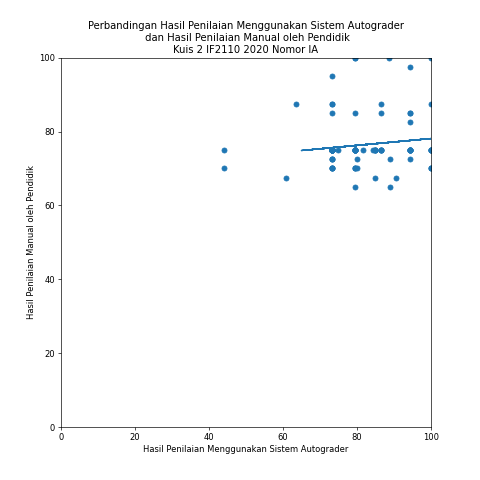

Linear Regression Plot of kuis2_IB exam:
Info for plot=Kuis 2 IF2110 2020 Nomor IB: m=0.2996531420037174, b=35.64235316862054


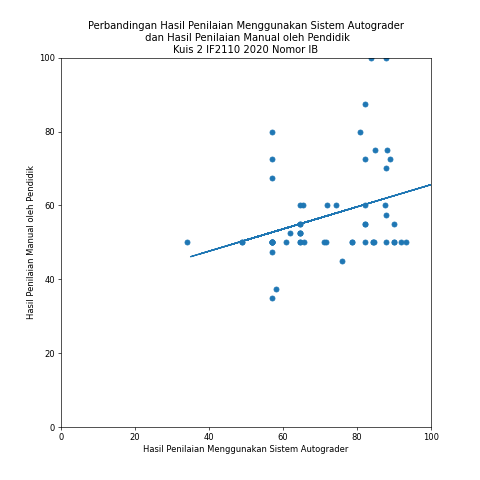

Linear Regression Plot of kuis2_IC exam:
Info for plot=Kuis 2 IF2110 2020 Nomor IC: m=0.5496254519978191, b=18.50605903636919


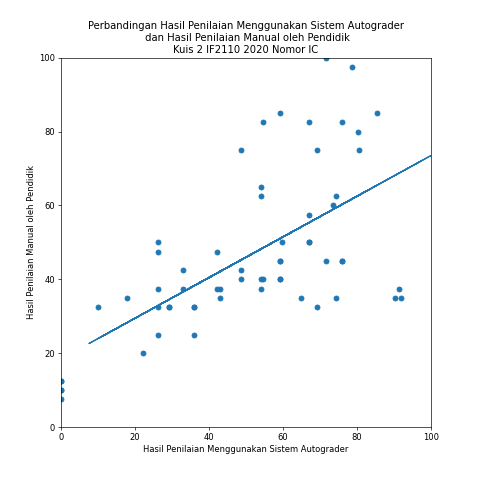

Linear Regression Plot of uts_IA exam:
Info for plot=UTS IF2110 2020 Nomor IA: m=0.8515503368455537, b=5.243857250355378


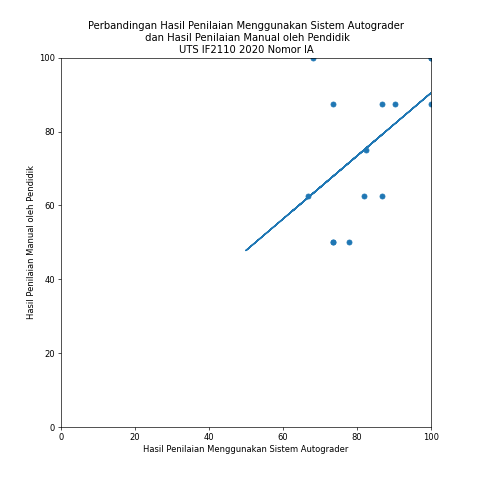

Linear Regression Plot of uts_IB exam:
Info for plot=UTS IF2110 2020 Nomor IB: m=0.6423136605439121, b=35.0797724259203


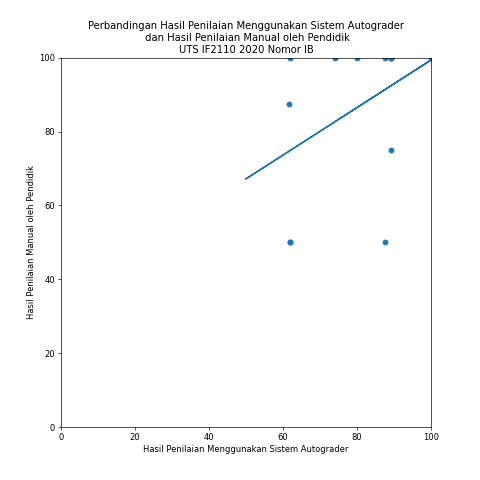

Linear Regression Plot of all exam:
Info for plot=Gabungan Data Persoalan: m=0.6494050079456779, b=19.192453956039596


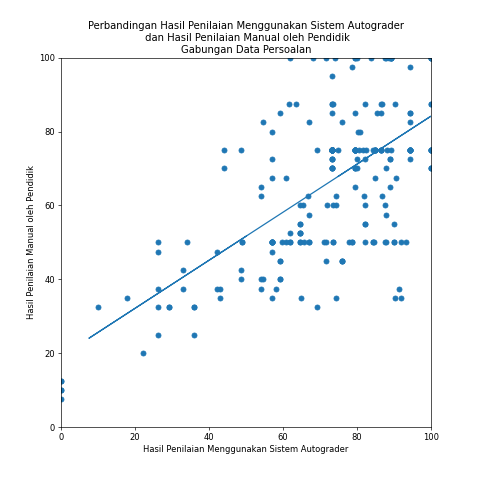

In [11]:
# Show Linear Regression Plot
for name, df in dataframes.items():
    print(f'Linear Regression Plot of {name} exam:')
    linear_regression_plot(MAP_FILE_NAMES[name], df)

Confusion Matrix Plot of kuis2_IA exam:


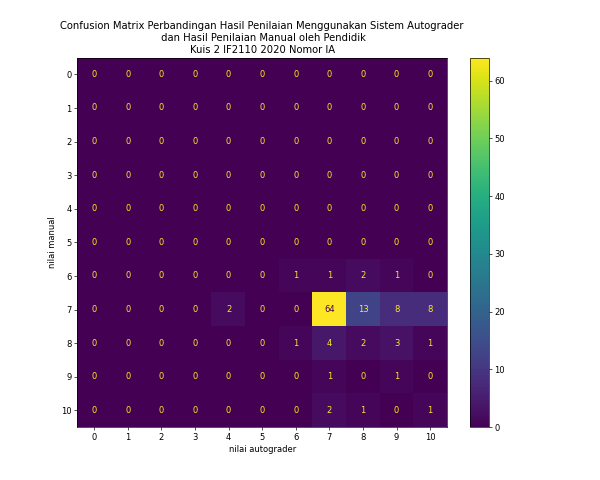

Confusion Matrix Plot of kuis2_IB exam:


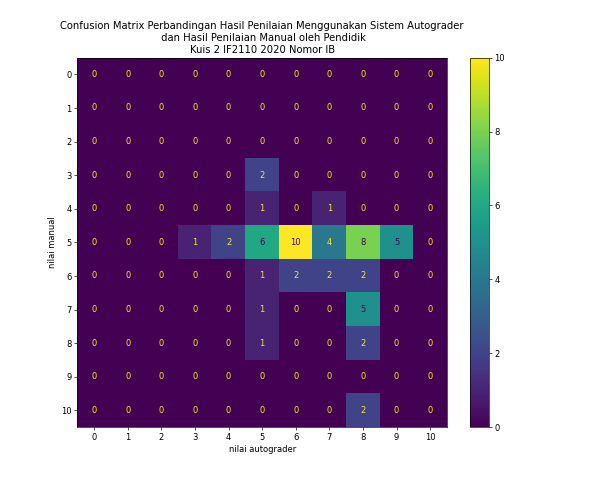

Confusion Matrix Plot of kuis2_IC exam:


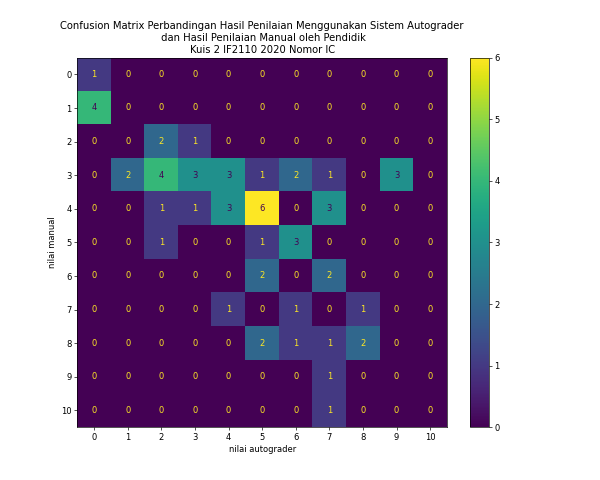

Confusion Matrix Plot of uts_IA exam:


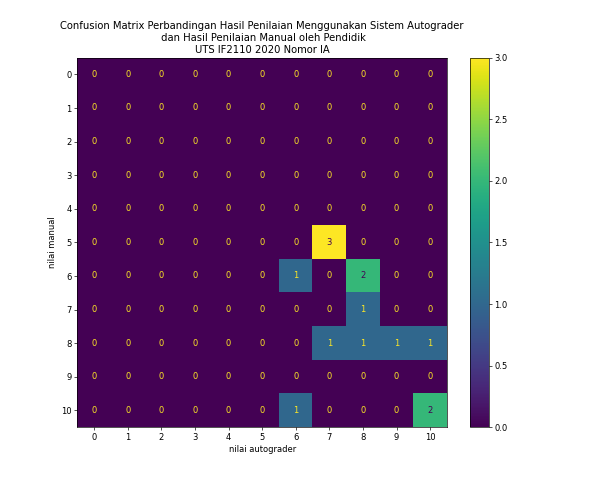

Confusion Matrix Plot of uts_IB exam:


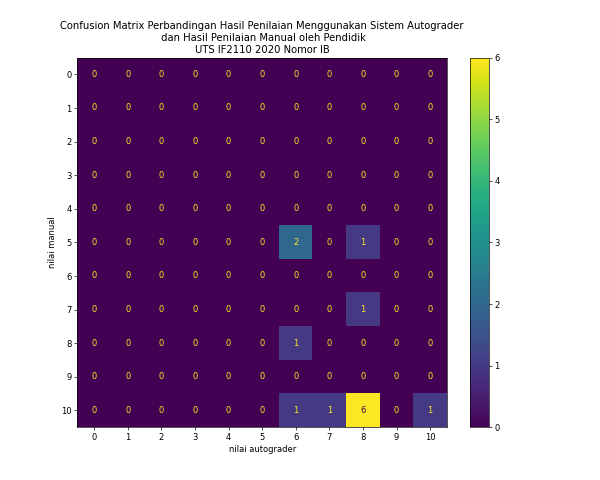

Confusion Matrix Plot of all exam:


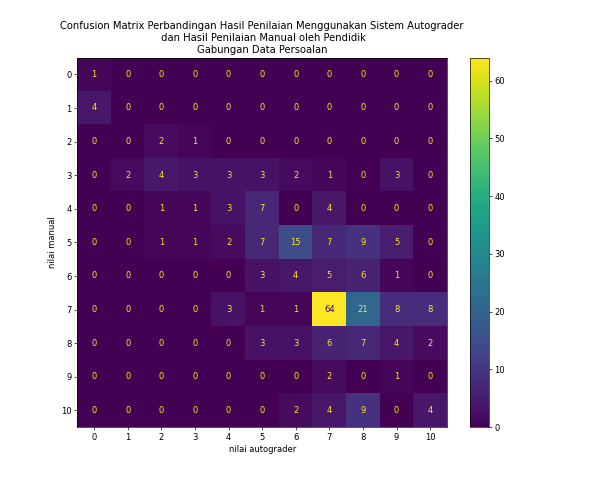

In [12]:
# Show Confusion Matrix Plot
for name, df in dataframes.items():
    print(f'Confusion Matrix Plot of {name} exam:')
    confusion_matrix_plot(MAP_FILE_NAMES[name], df)

Information on Difference of kuis2_IA exam:
Average 		:  3.675187373760686
Standard Deviation	:  11.661194570308863
Histogram Plot:


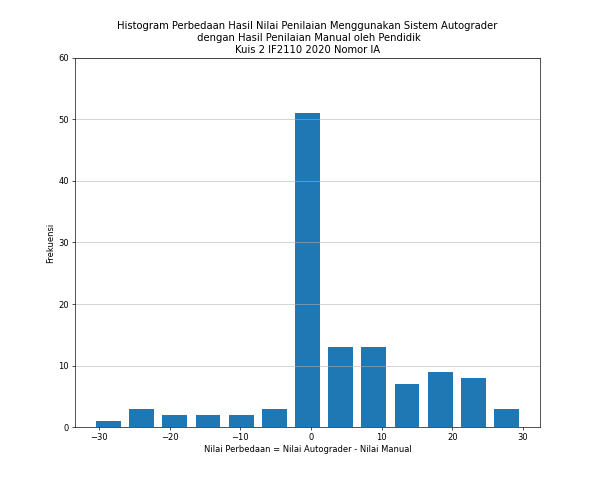

Information on Difference of kuis2_IB exam:
Average 		:  14.838713016724137
Standard Deviation	:  15.841242013488479
Histogram Plot:


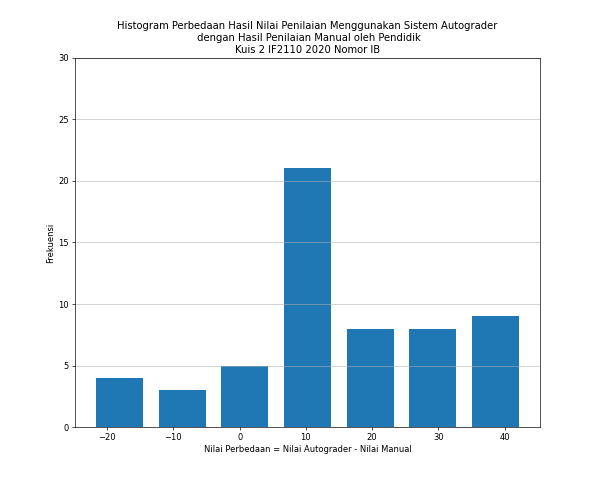

Information on Difference of kuis2_IC exam:
Average 		:  4.177530062459016
Standard Deviation	:  20.16083964434864
Histogram Plot:


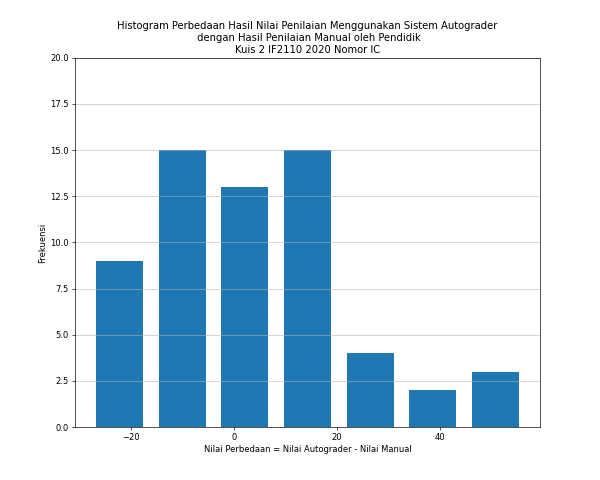

Information on Difference of uts_IA exam:
Average 		:  7.072291052857142
Standard Deviation	:  16.665072076091068
Histogram Plot:


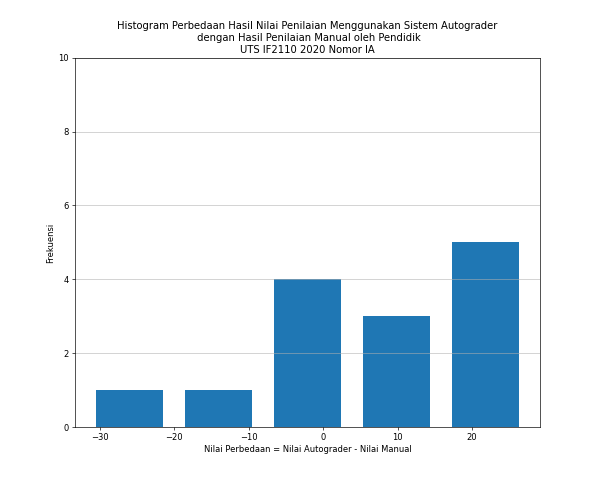

Information on Difference of uts_IB exam:
Average 		:  -6.3856348985714275
Standard Deviation	:  19.841426803721816
Histogram Plot:


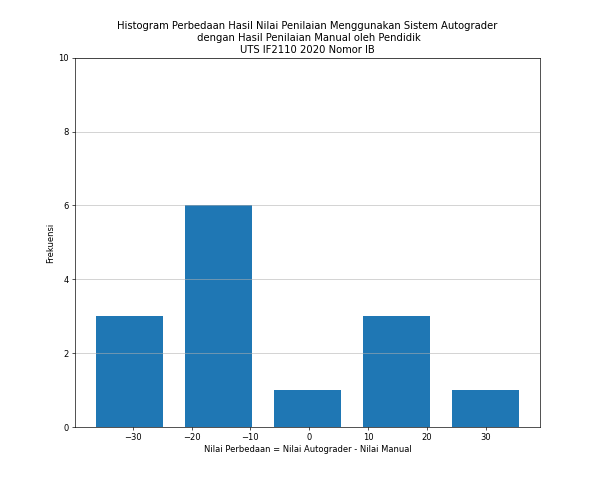

Information on Difference of all exam:
Average 		:  5.89047271844697
Standard Deviation	:  16.398144170082837
Histogram Plot:


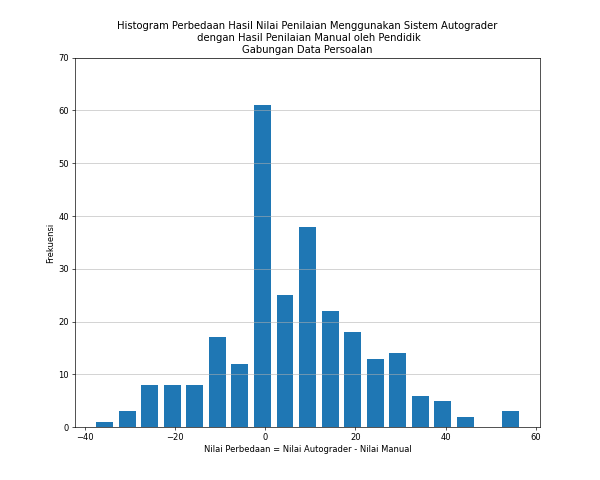

In [13]:
# Show Histogram Difference Plot
for name, df in dataframes.items():
    print(f'Information on Difference of {name} exam:')
    df_dif = df[X_AXIS] - df[Y_AXIS]
    print('Average \t\t: ', df_dif.mean())
    print('Standard Deviation\t: ', df_dif.std())
    print('Histogram Plot:')
    histogram_dif_plot(MAP_FILE_NAMES[name], df_dif)